In [1]:
import os
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
warnings.filterwarnings("ignore")


def load_data(file_path , filename):
    
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path)

C:\Users\Vimal\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def write_csv_data(file_path, filename, df):
    csv_path = os.path.join(file_path, filename)
    df.to_csv(csv_path)
    
    if os.path.exists(csv_path) and os.path.getsize(csv_path) > 0:
        print(filename + " was written to successfully!")

In [3]:
batting_file_path = "Data/2024"
bowling_file_path = "Data/2024"

batting_df = load_data(batting_file_path, "final_batting_2024.csv")
bowling_df = load_data(bowling_file_path, "final_bowling_2024.csv")

In [4]:
print(batting_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     2508 non-null   int64  
 1   Player  2508 non-null   object 
 2   Mat     2508 non-null   int64  
 3   Inns    2508 non-null   int64  
 4   NO      2508 non-null   int64  
 5   Runs    2508 non-null   int64  
 6   HS      2508 non-null   object 
 7   Avg     2508 non-null   object 
 8   BF      2508 non-null   int64  
 9   SR      2508 non-null   float64
 10  100     2508 non-null   int64  
 11  50      2508 non-null   int64  
 12  4s      2508 non-null   int64  
 13  6s      2508 non-null   int64  
 14  year    2508 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 294.0+ KB
None


In [5]:
print(bowling_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     1576 non-null   int64  
 1   Player  1576 non-null   object 
 2   Mat     1576 non-null   int64  
 3   Inns    1576 non-null   int64  
 4   Ov      1576 non-null   float64
 5   Wkts    1576 non-null   int64  
 6   Runs    1576 non-null   int64  
 7   BBI     1576 non-null   object 
 8   Avg     1576 non-null   float64
 9   Econ    1576 non-null   float64
 10  SR      1576 non-null   float64
 11  4w      1576 non-null   int64  
 12  5w      1576 non-null   int64  
 13  year    1576 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 172.5+ KB
None


In [6]:
def cleanBattingData(df_batting, team_names):
    # Handles cleaning the Average column
    df_batting['Avg'] = df_batting['Avg'].astype(str)
    df_batting['Avg'] = df_batting['Avg'].str.replace("-", "0")
    df_batting['Avg'] = df_batting['Avg'].str.strip("")
    df_batting['Avg'] = df_batting['Avg'].astype('float64')

    # Removing unneeded * from High Score column
    df_batting['HS'] = df_batting['HS'].str.replace("*", "")
    
    if 'POS' in df_batting.columns:
        # Dropping unneeded POS column
        df_batting.drop(['POS'], axis=1, inplace=True)

    def remove_team_names(text):
        for team in team_names:
            text = text.replace(team, '')
        return text
    
    df_batting['Player'] = df_batting['Player'].apply(remove_team_names)

    
    return df_batting

In [7]:
team_names = ['RR', 'RCB', 'CSK', 'MI', 'GT', 'PBKS', 'LSG', 'SRH', 'PWI', 'DC', 'KKR', 'RPS', 'GL', 'KTK', 'DEC']
df_batting_clean = cleanBattingData(batting_df, team_names)

write_csv_data("Outputs/2024/Cleaned_Datasets", "cleaned_batting.csv", df_batting_clean)

cleaned_batting.csv was written to successfully!


In [8]:
def aggregate_batting(df):
    # This is used to concatenate the dataframes and count the number of seasons each player played by counting the duplicates
    df_season_count = df['Player'].value_counts().reset_index()
    # We will rename the columns for the this dataframe to easily merge into the total dataframe
    df_season_count = df_season_count.rename(columns={"count": "Seasons"})
    
    # This concatenation will produce the actual total dataframe with unique entries for each player because of groupby
    df_all = df.groupby(['Player']).agg({'Mat': 'sum', 'Inns': 'sum', 'NO': 'sum', 'Runs': 'sum', 'HS': 'max', 'Avg': 'mean', 'BF': 'sum', 'SR': 'mean', '100': 'sum', '50': 'sum', '4s': 'sum', '6s': 'sum', 'year': 'max'}).reset_index()
    # We merge the season count into the total dataframe to add the Season column
    df_all_with_season_count = df_all.merge(df_season_count, on='Player', how='left')

    return df_all_with_season_count

In [9]:
df_batting_grouped = aggregate_batting(df_batting_clean)
print(len(df_batting_grouped))
write_csv_data("Outputs/2024/Grouped", "grouped_batting.csv", df_batting_grouped)

664
grouped_batting.csv was written to successfully!


In [10]:
df_batting_grouped[df_batting_grouped['Player'] == 'Virat Kohli']

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Seasons
638,Virat Kohli,252,244,37,8004,99,38.862941,6065,128.982941,8,55,705,272,2024,17


In [11]:
def cleanBowlingData(df_bowling, team_names):
    if 'POS' in df_bowling.columns:
        # Dropping unneeded POS column
        df_bowling.drop(['POS'], axis=1, inplace=True)

    if 'BBI' in df_bowling.columns:
        # Dropping unneeded BBI column
        df_bowling.drop(['BBI'], axis=1, inplace=True)

#    if 'year' in df_bowling.columns:
        # Dropping unneeded POS column
#        df_bowling.drop(['year'], axis=1, inplace=True)

    if 'Unnamed: 0' in df_bowling.columns:
        df_bowling.drop(['Unnamed: 0'], axis=1, inplace=True)

    def remove_team_names(text):
        for team in team_names:
            text = text.replace(team, '')
        return text
    
    df_bowling['Player'] = df_bowling['Player'].apply(remove_team_names)
    
    return df_bowling

In [12]:
df_bowling_clean = cleanBowlingData(bowling_df, team_names)

write_csv_data("Outputs/2024/Cleaned_Datasets", "cleaned_bowling.csv", df_bowling_clean)

cleaned_bowling.csv was written to successfully!


In [13]:
def agrgegate_bowling(df):
    # This is used to concatenate the dataframes and count the number of seasons each player played by counting the duplicates
    df_season_count = df['Player'].value_counts().reset_index()
    # We will rename the columns for the this dataframe to easily merge into the total dataframe
    df_season_count = df_season_count.rename(columns={"count": "Seasons"})
    
    # This concatenation will produce the actual total dataframe with unique entries for each player because of groupby
    df_all = df.groupby(['Player']).agg({'Mat': 'sum', 'Inns': 'sum', 'Ov': 'sum', 'Runs': 'sum', 'Wkts': 'sum', 'Avg': 'mean', 'Econ': 'mean', 'SR': 'mean', '4w': 'sum', '5w': 'sum', 'year': 'max'}).reset_index()
    # We merge the season count into the total dataframe to add the Season column
    df_all_with_season_count = df_all.merge(df_season_count, on='Player', how='left')

    return df_all_with_season_count

In [14]:
df_bowling_grouped = agrgegate_bowling(df_bowling_clean)
print(len(df_bowling_grouped))

write_csv_data("Outputs/2024/Grouped", "grouped_bowling.csv", df_bowling_grouped)

449
grouped_bowling.csv was written to successfully!


In [15]:
df_bowling_grouped.head()

,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w,year,Seasons
0,Aaron Finch,14,3,4.0,49,1,49.000000,12.250000,24.0,0,0,2013,1
1,Aavishkar Salvi,2,2,8.0,66,3,22.000000,8.250000,16.0,0,0,2011,1
2,Abdul Samad,12,3,7.0,96,1,96.000000,13.710000,42.0,0,0,2020,1
3,Abhimanyu Mithun,14,14,41.0,397,7,46.733333,10.563333,27.6,0,0,2013,3
4,Abhishek Jhunjhunwala,5,3,6.0,38,1,38.000000,6.330000,36.0,0,0,2012,1


In [16]:
numerical_columns = df_batting_grouped.select_dtypes(include=['int', 'float'])
numerical_columns.corr()['Runs'].sort_values(ascending=False)

Runs       1.000000
BF         0.996312
4s         0.985001
50         0.958054
Inns       0.952034
6s         0.937277
Mat        0.821635
Seasons    0.758266
100        0.655073
NO         0.636242
Avg        0.577578
SR         0.267799
year       0.257581
Name: Runs, dtype: float64

In [17]:
numerical_columns = df_bowling_grouped.select_dtypes(include=['int', 'float'])
numerical_columns.corr()['Wkts'].sort_values(ascending=False)

Wkts       1.000000
Runs       0.984323
Ov         0.982467
Inns       0.966336
Mat        0.911852
Seasons    0.890995
4w         0.716413
5w         0.472944
year       0.321940
SR        -0.075759
Avg       -0.141399
Econ      -0.212517
Name: Wkts, dtype: float64

In [18]:
# Get players that had their most recent season in 2020 and above
df_batting_grouped = df_batting_grouped[df_batting_grouped['year'] >= 2024]
print(len(df_batting_grouped))

df_bowling_grouped = df_bowling_grouped[df_bowling_grouped['year'] >= 2024]
print(len(df_bowling_grouped))

167
105


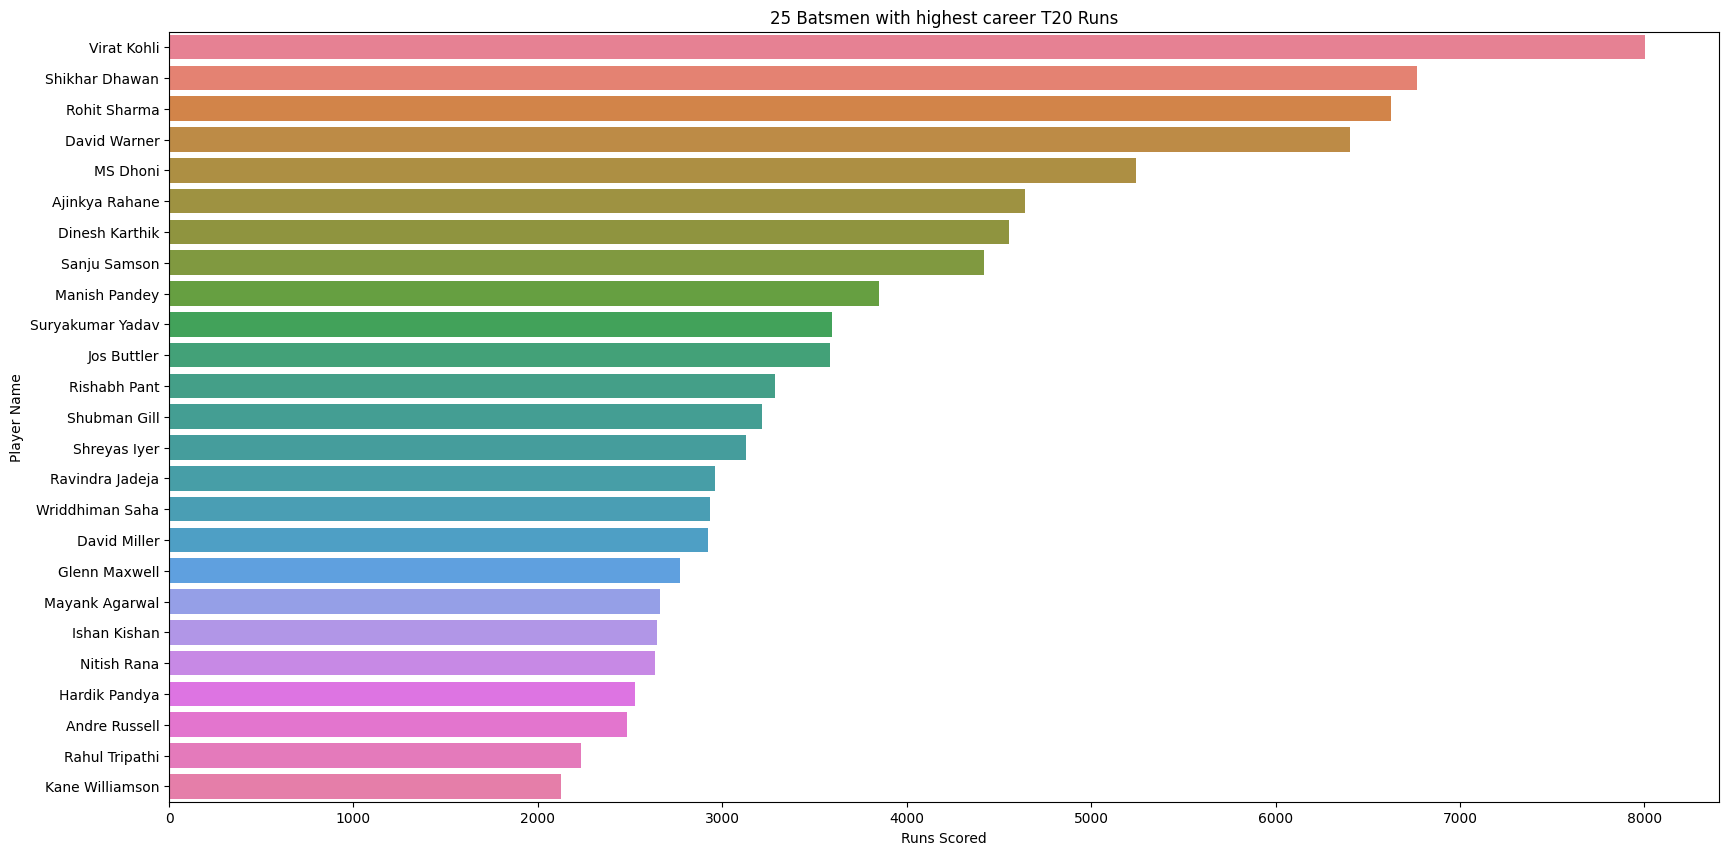

In [19]:
df_most_runs = df_batting_grouped.sort_values(by = ['Runs'], ascending = False)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Batsmen with highest career T20 Runs")
ax = sns.barplot(x = df_most_runs["Runs"], y = df_most_runs["Player"], palette = "husl")
ax.set(ylabel="Player Name", xlabel="Runs Scored")
plt.show()

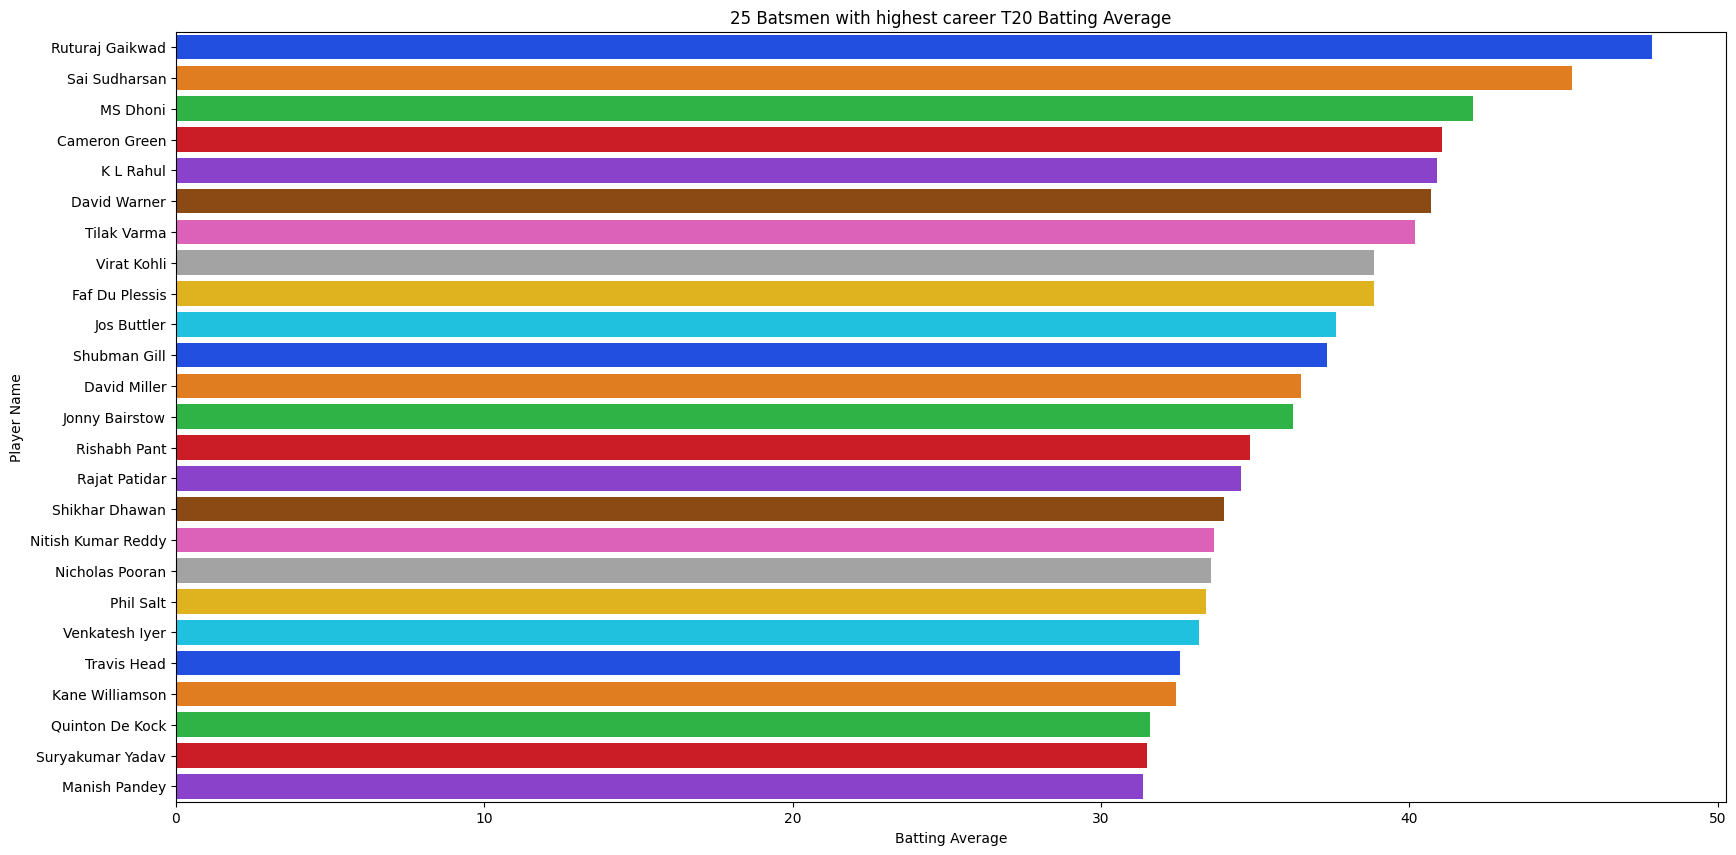

In [20]:
df_highest_avg = df_batting_grouped[df_batting_grouped['BF'] >= 200].sort_values(by = ['Avg'], ascending = False)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Batsmen with highest career T20 Batting Average")
ax = sns.barplot(x = df_highest_avg["Avg"], y = df_highest_avg["Player"], palette = "bright");
ax.set(ylabel="Player Name", xlabel="Batting Average")
plt.show()

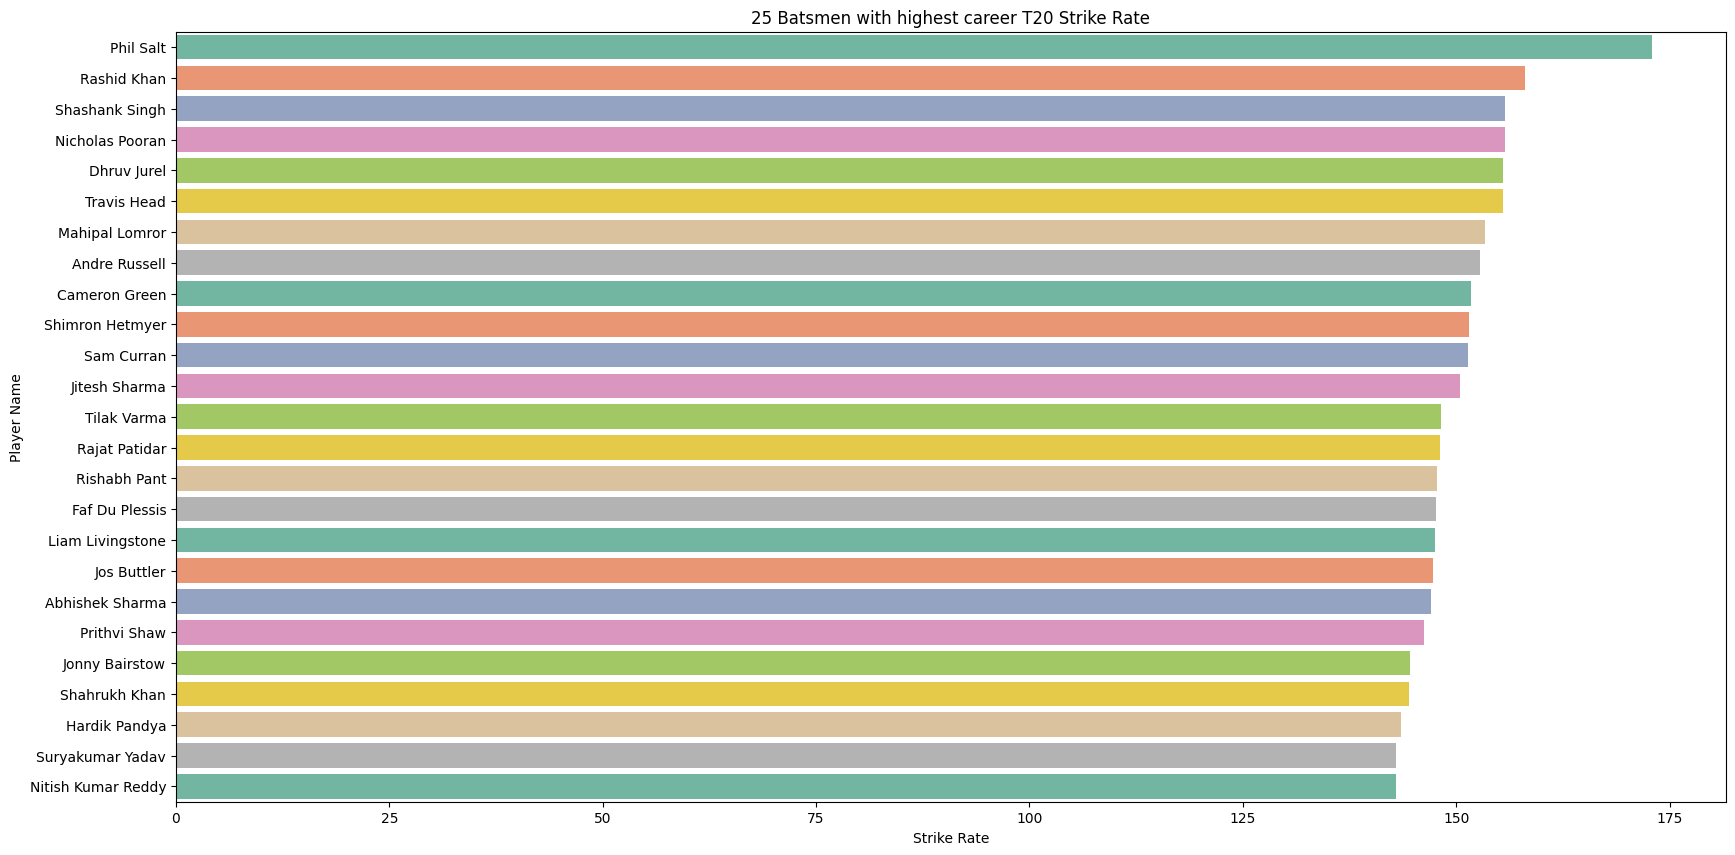

In [21]:
df_highest_strike_rate = df_batting_grouped[df_batting_grouped['BF'] >= 200].sort_values(by = ['SR'], ascending = False)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Batsmen with highest career T20 Strike Rate")
ax = sns.barplot(x = df_highest_strike_rate["SR"], y = df_highest_strike_rate["Player"], palette = "Set2");
ax.set(ylabel="Player Name", xlabel="Strike Rate")
plt.show()

In [22]:
# Code to identify elite and great averages and strike rates to be used to identify exceptional and great batsmen

elite_batting_average_threshold = df_batting_grouped[df_batting_grouped['BF'] >= 200]['Avg'].quantile(0.85)
great_batting_average_threshold = df_batting_grouped[df_batting_grouped['BF'] >= 200]['Avg'].quantile(0.75)

elite_batting_sr_threshold = df_batting_grouped[df_batting_grouped['BF'] >= 200]['SR'].quantile(0.80) # Reducing strike rate requirement since it is too restricting
great_batting_sr_threshold = df_batting_grouped[df_batting_grouped['BF'] >= 200]['SR'].quantile(0.75)

print("Elite Average Threshold: ", elite_batting_average_threshold)
print("Great Average Threshold: ", great_batting_average_threshold)

print("Elite Strike Rate Threshold: ", elite_batting_sr_threshold)
print("Great Strike Rate Threshold: ", great_batting_sr_threshold)

Elite Average Threshold:  34.80854166666666
Great Average Threshold:  31.799444444444447
Elite Strike Rate Threshold:  147.20285714285714
Great Strike Rate Threshold:  143.73125


In [23]:
df_batting_grouped[(df_batting_grouped['Avg'] >= great_batting_average_threshold) & (df_batting_grouped['SR'] >= great_batting_sr_threshold)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Seasons
117,Cameron Green,29,28,11,707,46,41.050000,460,151.765000,1,2,62,32,2024,2
190,Faf Du Plessis,45,45,2,1636,96,38.850000,1113,147.606667,0,15,156,70,2024,3
239,Jake Fraser - McGurk,9,9,0,330,84,36.670000,141,234.040000,0,4,32,28,2024,1
264,Jonny Bairstow,50,50,4,1589,97,36.222000,1100,144.634000,2,9,166,69,2024,5
265,Jos Buttler,107,106,12,3582,95,37.616667,2428,147.280000,7,19,355,161,2024,9
398,Nicholas Pooran,76,73,18,1769,77,33.580000,1090,155.671667,0,9,113,127,2024,6
422,Phil Salt,21,21,2,653,89,33.400000,372,172.950000,0,6,74,34,2024,2
455,Rajat Patidar,27,24,1,799,55,34.543333,503,148.130000,1,7,51,54,2024,3
477,Rishabh Pant,111,110,17,3284,97,34.822500,2205,147.722500,1,18,296,154,2024,8
601,Tilak Varma,38,38,9,1156,84,40.190000,790,148.256667,0,6,90,58,2024,3


In [24]:
write_csv_data("Outputs/2024/Best_Players", "great_batsmen.csv", df_batting_grouped[(df_batting_grouped['Avg'] >= great_batting_average_threshold) & (df_batting_grouped['SR'] >= great_batting_sr_threshold)])

great_batsmen.csv was written to successfully!


In [25]:
df_batting_grouped[(df_batting_grouped['Avg'] >= elite_batting_average_threshold) & (df_batting_grouped['SR'] >= elite_batting_sr_threshold)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Seasons
117,Cameron Green,29,28,11,707,46,41.050000,460,151.765000,1,2,62,32,2024,2
190,Faf Du Plessis,45,45,2,1636,96,38.850000,1113,147.606667,0,15,156,70,2024,3
239,Jake Fraser - McGurk,9,9,0,330,84,36.670000,141,234.040000,0,4,32,28,2024,1
265,Jos Buttler,107,106,12,3582,95,37.616667,2428,147.280000,7,19,355,161,2024,9
477,Rishabh Pant,111,110,17,3284,97,34.822500,2205,147.722500,1,18,296,154,2024,8
601,Tilak Varma,38,38,9,1156,84,40.190000,790,148.256667,0,6,90,58,2024,3


In [26]:
write_csv_data("Outputs/2024/Best_Players", "exceptional_batsmen.csv", df_batting_grouped[(df_batting_grouped['Avg'] >= elite_batting_average_threshold) & (df_batting_grouped['SR'] >= elite_batting_sr_threshold)])

exceptional_batsmen.csv was written to successfully!


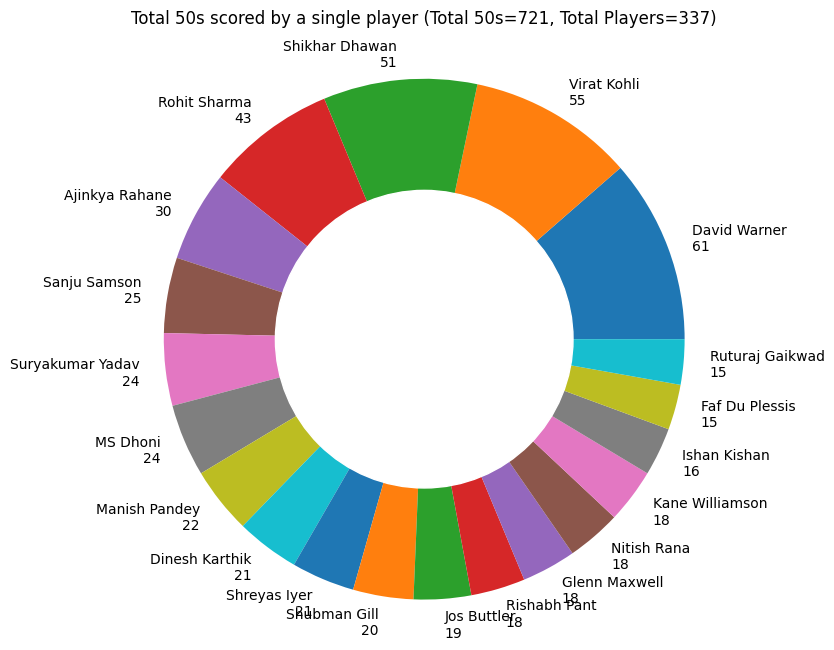

In [27]:
df_50 = df_batting_grouped.sort_values(by="50", ascending=False)[:20].copy()
df_50["custom_label"] = df_50["Player"] + "\n" + df_50["50"].astype(str)

plt.figure(figsize = (6, 8))
plt.pie(df_50["50"], labels=df_50["custom_label"], radius = 1.4, labeldistance=1.1, pctdistance=0.8)

circle = plt.Circle((0, 0), 0.8, color='white')
plt.title("Total 50s scored by a single player (Total 50s=721, Total Players=337)", pad=60)
plt.gca().add_artist(circle)
plt.show()

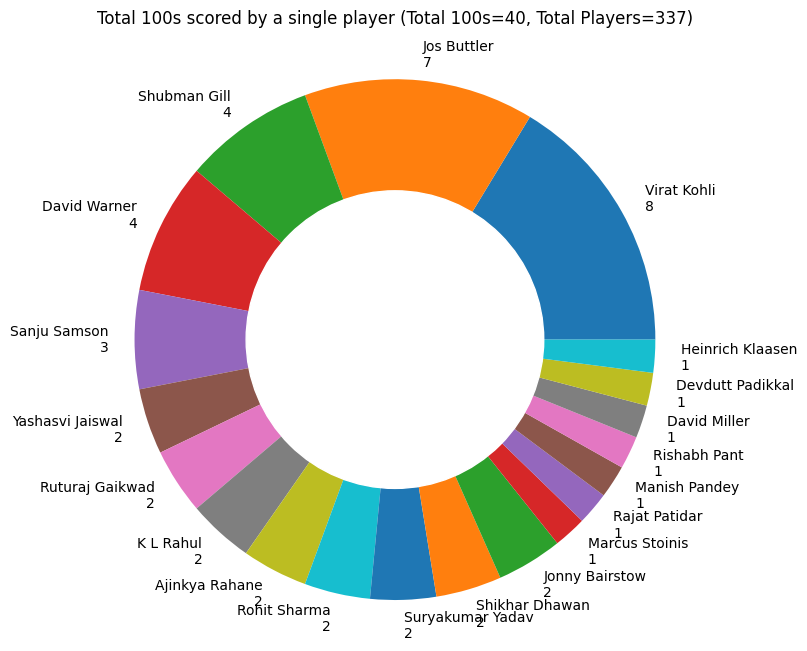

In [28]:
df_100 = df_batting_grouped.sort_values(by="100", ascending=False)[:20].copy()
df_100["custom_label"] = df_100["Player"] + "\n" + df_100["100"].astype(str)

plt.figure(figsize = (6, 8))
plt.pie(df_100["100"], labels=df_100["custom_label"], radius = 1.4, labeldistance=1.1, pctdistance=0.8)

circle = plt.Circle((0, 0), 0.8, color='white')
plt.title("Total 100s scored by a single player (Total 100s=40, Total Players=337)", pad=60)
plt.gca().add_artist(circle)
plt.show()

In [116]:
# Function to assign ratings based on quantiles, supporting reverse scoring
def assignRatingForMetricBatting(df, column_name, min_balls_faced=200, quantiles=[0, 0.2, 0.4, 0.6, 0.8, 1]):
    """
    Assigns a rating score from 1 to 5 based on quantiles, with an option to reverse the rating scale.

    Args:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the metric column.
    min_balls_faced (int): Minimum balls faced to qualify for rating.
    quantiles (list): List of quantile breakpoints for bucketing.
    reverse (bool): If True, assigns higher ratings to lower values.

    Returns:
    DataFrame: Updated DataFrame with a new rating column.
    """

    # Compute quantile-based bins dynamically
    quantile_bins = df[df["BF"] >= min_balls_faced][column_name].quantile(quantiles).values

    # Ensure bins are unique to avoid pd.cut errors
    quantile_bins = np.unique(quantile_bins)
    print(quantile_bins)

    # Define labels (1-5 for lowest to highest)
    labels = range(1, len(quantile_bins))

    # Assign ratings based on quantiles
    df["Batting_" + column_name + "_Score"] = pd.cut(df[column_name], bins=quantile_bins, labels=labels, include_lowest=True)

    # Convert categorical labels to numeric and handle players with < min_balls_faced
    df["Batting_" + column_name + "_Score"] = np.where(
        df["BF"] >= min_balls_faced, df["Batting_" + column_name + "_Score"].cat.codes + 1, 1
    )

    return df


In [117]:
# Will use quantile buckets that is dynamic and not hardcoded
df_batting_grouped = assignRatingForMetricBatting(df_batting_grouped, "Runs")

[ 183.   489.8  891.  1539.  2727.  8004. ]


In [118]:
df_batting_grouped = assignRatingForMetricBatting(df_batting_grouped, "Avg")

[ 7.95888889 18.904      24.02537778 28.1304     33.508      47.8725    ]


In [119]:
df_batting_grouped = assignRatingForMetricBatting(df_batting_grouped, "SR")

[ 84.85357143 120.13044444 131.18025882 137.9664     147.20285714
 172.95      ]


In [120]:
df_batting_grouped["Landmarks"] = df_batting_grouped["50"] + df_batting_grouped["100"]

df_batting_grouped = assignRatingForMetricBatting(df_batting_grouped, "Landmarks")

[ 0.   1.   4.   8.2 16.6 65. ]


In [121]:
df_batting_grouped["total_boundaries"] = df_batting_grouped["4s"] + df_batting_grouped["6s"]
df_batting_grouped = assignRatingForMetricBatting(df_batting_grouped, "total_boundaries")

[ 19.   61.2 112.6 201.8 370.8 977. ]


In [122]:
df_batting_grouped['Batting_Total_rating'] = df_batting_grouped["Batting_Runs_Score"] + df_batting_grouped["Batting_Avg_Score"] + df_batting_grouped["Batting_SR_Score"] + df_batting_grouped["Batting_Landmarks_Score"] + df_batting_grouped["Batting_total_boundaries_Score"]

In [123]:
df_batting_rating_system = df_batting_grouped.sort_values(by='Batting_Total_rating', ascending=False)[:75]
px.scatter(df_batting_rating_system, x="Runs", y="SR",
           size="Avg", color="Batting_Total_rating", hover_name="Player", size_max=55,title="Top 75 T20 Batsmen based on Rating System")

In [43]:
write_csv_data("Outputs/2024/Best_Players", "top_75_batsmen.csv", df_batting_rating_system)

top_75_batsmen.csv was written to successfully!


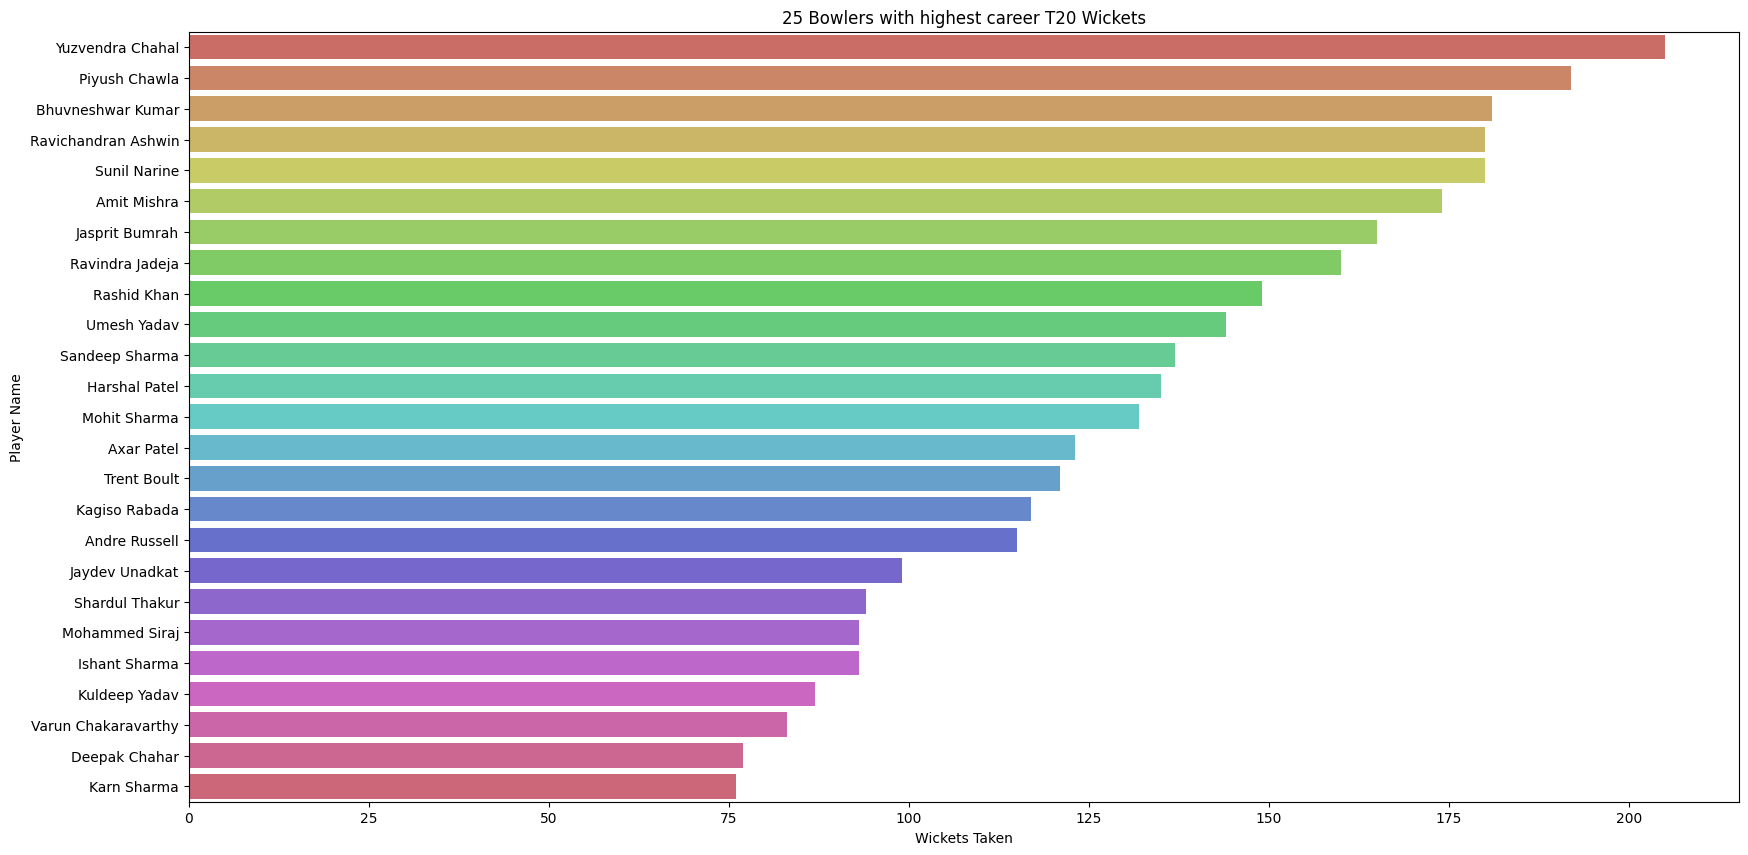

In [44]:
df_most_wickets = df_bowling_grouped.sort_values(by = ['Wkts'], ascending = False)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Bowlers with highest career T20 Wickets")
ax = sns.barplot(x = df_most_wickets["Wkts"], y = df_most_wickets["Player"], palette = "hls")
ax.set(ylabel="Player Name", xlabel="Wickets Taken")
plt.show()

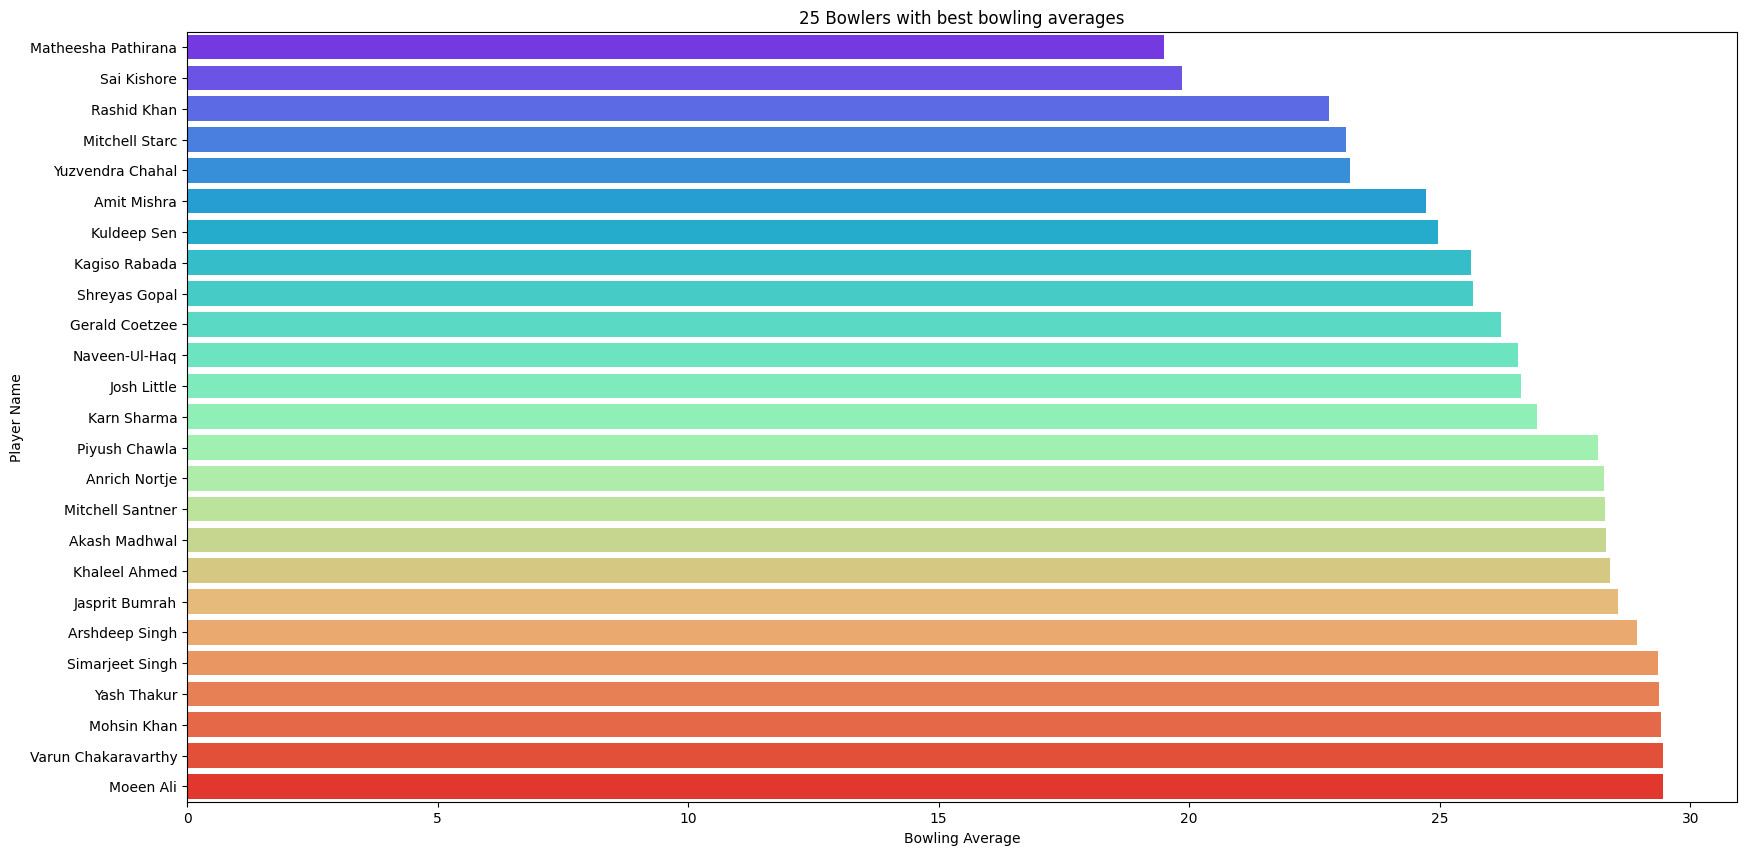

In [45]:
df_best_averages = df_bowling_grouped[df_bowling_grouped["Ov"] >= 20].sort_values(by = ['Avg'], ascending = True)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Bowlers with best bowling averages")
ax = sns.barplot(x = df_best_averages["Avg"], y = df_best_averages["Player"], palette = "rainbow")
ax.set(ylabel="Player Name", xlabel="Bowling Average")
plt.show()

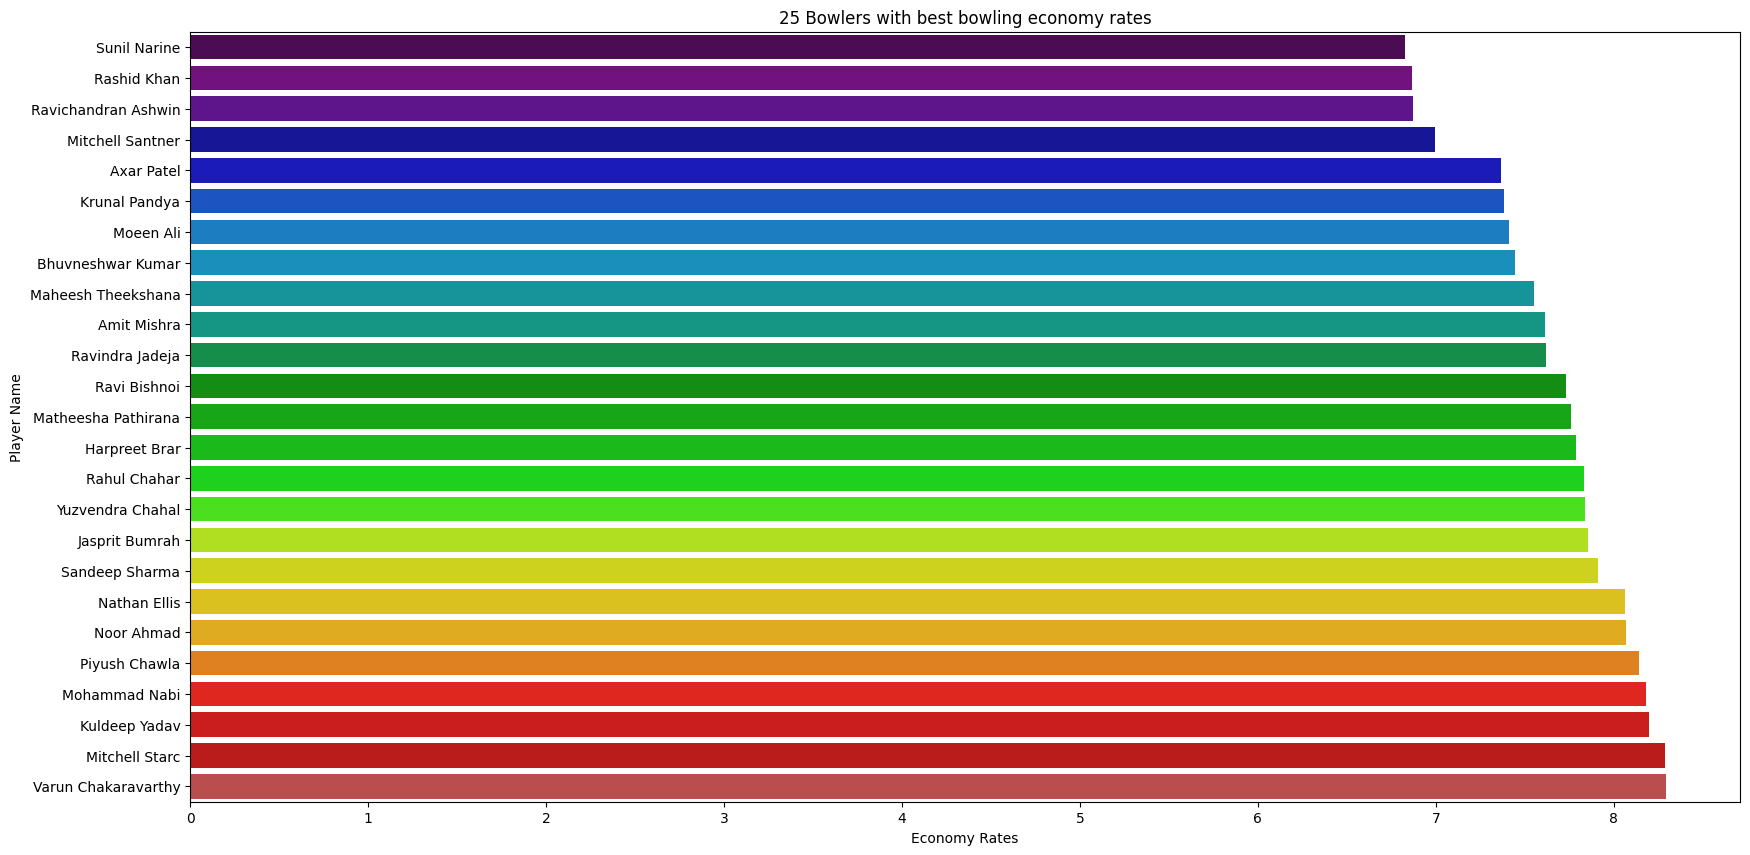

In [46]:
df_best_economy_rates = df_bowling_grouped[df_bowling_grouped["Ov"] >= 20].sort_values(by = ['Econ'], ascending = True)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Bowlers with best bowling economy rates")
ax = sns.barplot(x = df_best_economy_rates["Econ"], y = df_best_economy_rates["Player"], palette = "nipy_spectral")
ax.set(ylabel="Player Name", xlabel="Economy Rates")
plt.show()

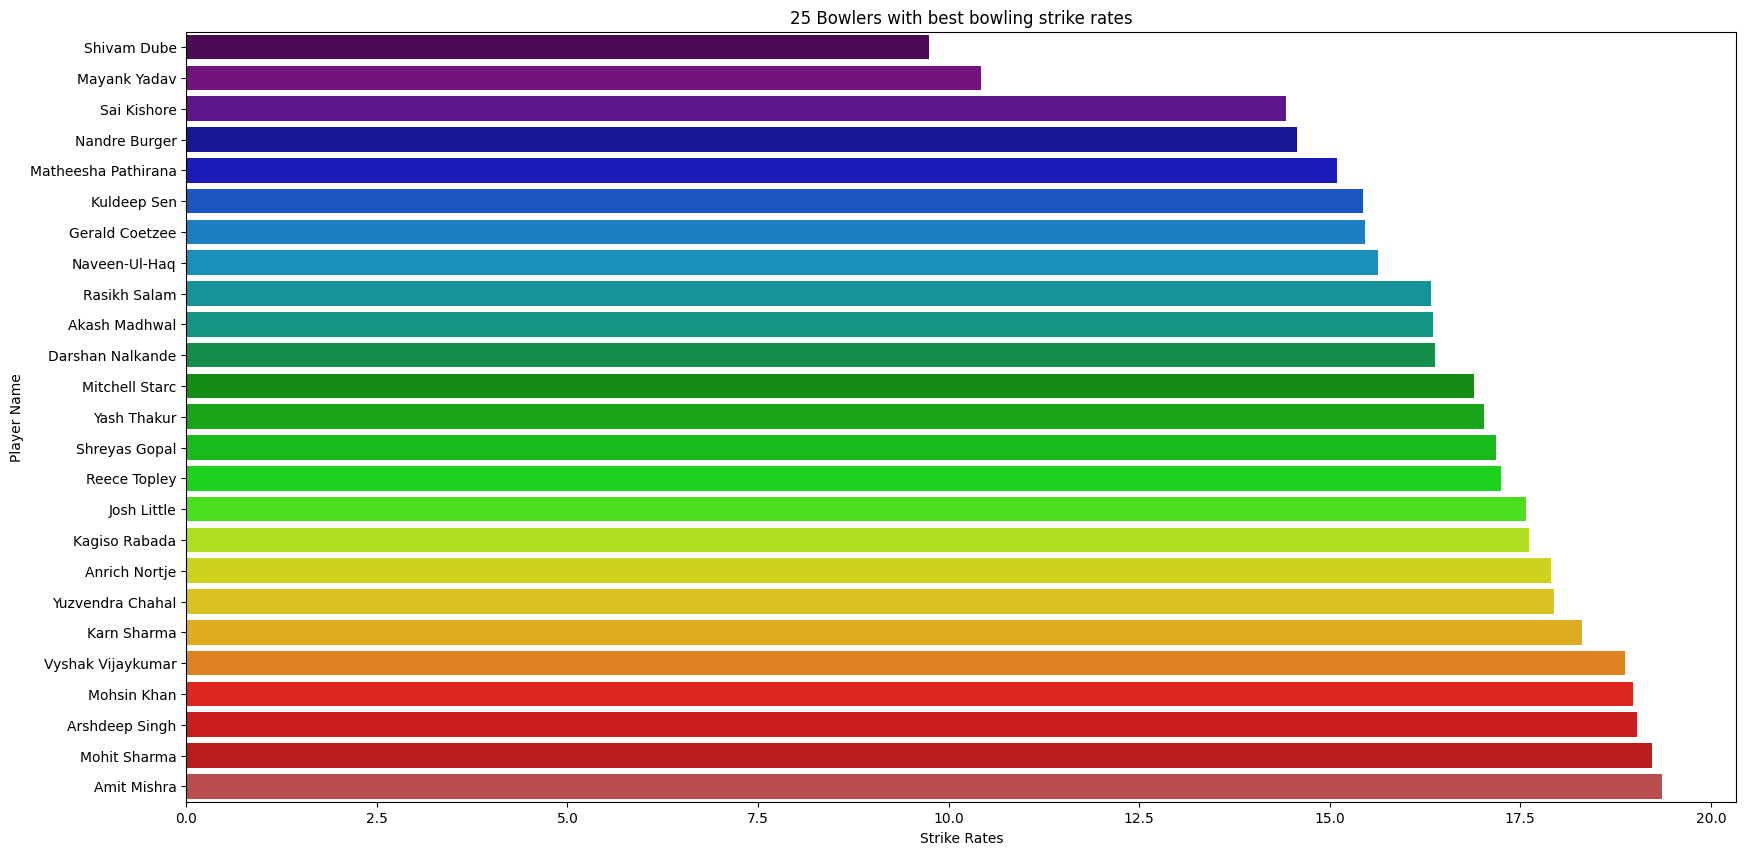

In [47]:
df_best_strike_rates = df_bowling_grouped[df_bowling_grouped["Ov"] >= 10].sort_values(by = ['SR'], ascending = True)[:25].copy()
plt.figure(figsize = (20, 10))
plt.title("25 Bowlers with best bowling strike rates")
ax = sns.barplot(x = df_best_strike_rates["SR"], y = df_best_strike_rates["Player"], palette = "nipy_spectral")
ax.set(ylabel="Player Name", xlabel="Strike Rates")
plt.show()

In [48]:
# Code to identify elite and great averages and economy rates to be used to identify exceptional and great bowlers

elite_bowling_average_threshold = df_bowling_grouped[df_bowling_grouped['Ov'] >= 10]['Avg'].quantile(0.15)
great_bowling_average_threshold = df_bowling_grouped[df_bowling_grouped['Ov'] >= 10]['Avg'].quantile(0.25)

elite_bowling_econ_threshold = df_bowling_grouped[df_bowling_grouped['Ov'] >= 10]['Econ'].quantile(0.20) # Reducing strike rate requirement since it is too restricting
great_bowling_econ_threshold = df_bowling_grouped[df_bowling_grouped['Ov'] >= 10]['Econ'].quantile(0.25)

print("Elite Average Threshold: ", elite_bowling_average_threshold)
print("Great Average Threshold: ", great_bowling_average_threshold)

print("Elite Strike Rate Threshold: ", elite_bowling_econ_threshold)
print("Great Strike Rate Threshold: ", great_bowling_econ_threshold)

Elite Average Threshold:  26.62225
Great Average Threshold:  29.04
Elite Strike Rate Threshold:  7.999666666666667
Great Strike Rate Threshold:  8.217916666666667


In [49]:
great_bowlers = df_bowling_grouped[(df_bowling_grouped['Ov'] >= 10) & (df_bowling_grouped['Avg'] <= great_bowling_average_threshold) & (df_bowling_grouped['Econ'] <= great_bowling_econ_threshold)].sort_values(by="Wkts", ascending=False)
great_bowlers

,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w,year,Seasons
447,Yuzvendra Chahal,159,158,581.5,4568,205,23.201818,7.837273,17.940909,6,1,2024,11
293,Piyush Chawla,192,191,640.0,5108,192,28.167500,8.141250,20.804375,2,0,2024,16
26,Amit Mishra,162,162,561.0,4149,174,24.725000,7.613125,19.365625,4,1,2024,16
164,Jasprit Bumrah,133,133,506.7,3714,165,28.552727,7.852727,21.330909,2,2,2024,11
314,Rashid Khan,121,121,475.9,3252,149,22.792500,6.863750,19.841250,2,0,2024,8
233,Matheesha Pathirana,20,20,74.7,592,34,19.506667,7.760000,15.093333,1,0,2024,3
243,Mitchell Santner,18,18,61.0,422,15,28.300000,6.996000,24.300000,0,0,2024,5
237,Mayank Yadav,4,4,12.1,85,7,12.140000,6.980000,10.420000,0,0,2024,1


In [50]:
write_csv_data("Outputs/2024/Best_Players", "great_bowlers.csv", great_bowlers)

great_bowlers.csv was written to successfully!


In [51]:
exceptional_bowlers = df_bowling_grouped[(df_bowling_grouped['Ov'] >= 10) & (df_bowling_grouped['Avg'] <= elite_bowling_average_threshold) & (df_bowling_grouped['Econ'] <= elite_bowling_econ_threshold)].sort_values(by="Wkts", ascending=False)
exceptional_bowlers

,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w,year,Seasons
447,Yuzvendra Chahal,159,158,581.5,4568,205,23.201818,7.837273,17.940909,6,1,2024,11
26,Amit Mishra,162,162,561.0,4149,174,24.725000,7.613125,19.365625,4,1,2024,16
314,Rashid Khan,121,121,475.9,3252,149,22.792500,6.863750,19.841250,2,0,2024,8
233,Matheesha Pathirana,20,20,74.7,592,34,19.506667,7.760000,15.093333,1,0,2024,3
237,Mayank Yadav,4,4,12.1,85,7,12.140000,6.980000,10.420000,0,0,2024,1


In [52]:
write_csv_data("Outputs/2024/Best_Players", "exceptional_bowlers.csv", exceptional_bowlers)

exceptional_bowlers.csv was written to successfully!


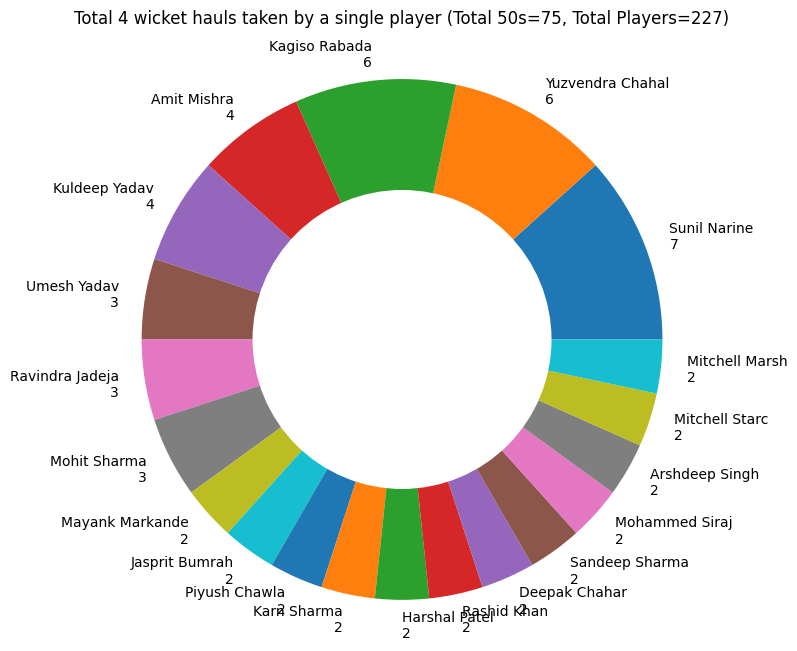

In [53]:
df_4w = df_bowling_grouped.sort_values(by="4w", ascending=False)[:20].copy()
df_4w["custom_label"] = df_4w["Player"] + "\n" + df_4w["4w"].astype(str)

plt.figure(figsize = (6, 8))
plt.pie(df_4w["4w"], labels=df_4w["custom_label"], radius = 1.4, labeldistance=1.1, pctdistance=0.8)

circle = plt.Circle((0, 0), 0.8, color='white')
plt.title("Total 4 wicket hauls taken by a single player (Total 50s=75, Total Players=227)", pad=60)
plt.gca().add_artist(circle)
plt.show()

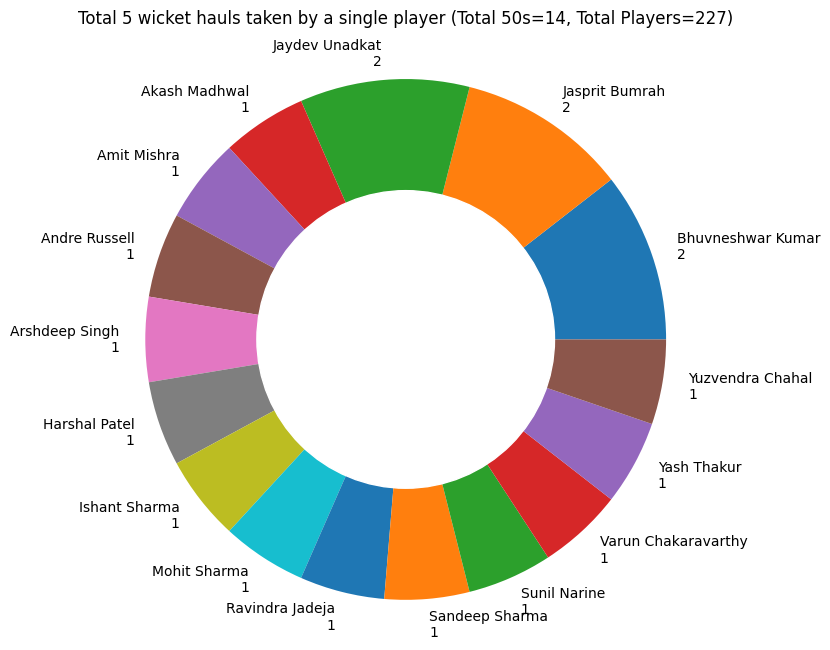

In [54]:
df_5w = df_bowling_grouped[df_bowling_grouped["5w"] > 0].sort_values(by="5w", ascending=False).copy()
df_5w["custom_label"] = df_5w["Player"] + "\n" + df_5w["5w"].astype(str)

plt.figure(figsize = (6, 8))
plt.pie(df_5w["5w"], labels=df_5w["custom_label"], radius = 1.4, labeldistance=1.1, pctdistance=0.8)

circle = plt.Circle((0, 0), 0.8, color='white')
plt.title("Total 5 wicket hauls taken by a single player (Total 50s=14, Total Players=227)", pad=60)
plt.gca().add_artist(circle)
plt.show()

In [100]:
# Function to assign ratings based on quantiles, supporting reverse scoring
def assignRatingForMetricBowling(df, column_name, min_overs=10, quantiles=[0, 0.2, 0.4, 0.6, 0.8, 1]):
    """
    Assigns a rating score from 1 to 5 based on quantiles, with an option to reverse the rating scale.

    Args:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the metric column.
    min_overs (int): Minimum overs bowled to qualify for rating.
    quantiles (list): List of quantile breakpoints for bucketing.
    reverse (bool): If True, assigns higher ratings to lower values.

    Returns:
    DataFrame: Updated DataFrame with a new rating column.
    """

    # Compute quantile-based bins dynamically
    quantile_values  = df[df["Ov"] >= min_overs][column_name].quantile(quantiles).values

    # Ensure bins are unique to avoid pd.cut errors
    quantile_values  = np.unique(quantile_values )

    # Define labels (always in ascending order)
    labels = range(1, len(quantile_values))


    # Assign ratings based on quantiles
    df["Bowling_" + column_name + "_Score"] = pd.cut(df[column_name], bins=quantile_values, labels=labels, include_lowest=True)

    # Convert categorical labels to numeric and handle players with < min_overs
    df["Bowling_" + column_name + "_Score"] = np.where(
        df["Ov"] >= min_overs, df["Bowling_" + column_name + "_Score"].cat.codes + 1, 1
    )

    return df


In [101]:
# Need to add a landmarks column so the count of 4 wicket hauls and 5 wicket hauls per bowler will be aggregated.
df_bowling_grouped["Landmarks"] = df_bowling_grouped["4w"] + (df_bowling_grouped["5w"] * 2)

df_bowling_rating = df_bowling_grouped.copy()

# Converting all of the columns below to negative since a lower one of these values means more ratings
df_bowling_rating["Econ"] = df_bowling_rating["Econ"] * -1
df_bowling_rating["Avg"] = df_bowling_rating["Avg"] * -1
df_bowling_rating["SR"] = df_bowling_rating["SR"] * -1

In [102]:
# Will call the function since it creates quantile buckets already
df_bowling_rating = assignRatingForMetricBowling(df_bowling_rating, "Wkts")

In [103]:
# Doing reverse since lower is better
df_bowling_rating = assignRatingForMetricBowling(df_bowling_rating, "Avg")

In [104]:
# Need to use a reversed label since lower the strike rate the better the score
df_bowling_rating = assignRatingForMetricBowling(df_bowling_rating, "SR")

In [105]:
# Need to use a reversed label since lower the economy rate the better the score
df_bowling_rating = assignRatingForMetricBowling(df_bowling_rating, "Econ")

In [106]:
df_bowling_rating = assignRatingForMetricBowling(df_bowling_rating, "Landmarks")

In [107]:
df_bowling_rating['Bowling_Total_rating'] = df_bowling_rating["Bowling_Wkts_Score"] + df_bowling_rating["Bowling_Avg_Score"] + df_bowling_rating["Bowling_SR_Score"] + df_bowling_rating["Bowling_Landmarks_Score"] + df_bowling_rating["Bowling_Econ_Score"]

In [108]:
# Converting all of the columns below to negative since a lower one of these values means more ratings
df_bowling_rating["Econ"] = df_bowling_rating["Econ"] * -1
df_bowling_rating["Avg"] = df_bowling_rating["Avg"] * -1
df_bowling_rating["SR"] = df_bowling_rating["SR"] * -1

In [109]:
df_bowling_rating_system = df_bowling_rating.sort_values(by='Bowling_Total_rating', ascending=False)[:75]
px.scatter(df_bowling_rating_system, x="Wkts", y="Econ",
           size="Avg", color="Bowling_Total_rating", hover_name="Player", size_max=55,title="Top 75 T20 Bowlers based on Rating System")

In [110]:
write_csv_data("Outputs/2024/Best_Players", "top_75_bowlers.csv", df_bowling_rating_system)

top_75_bowlers.csv was written to successfully!


In [111]:
df_rating_batting = df_batting_grouped[['Player',  'Batting_Runs_Score', 'Batting_Avg_Score', 'Batting_SR_Score', 'Batting_Landmarks_Score', 'Batting_total_boundaries_Score', 'Batting_Total_rating']].copy()
df_rating_bowling = df_bowling_rating[['Player', 'Bowling_Wkts_Score', 'Bowling_Avg_Score', 'Bowling_SR_Score', 'Bowling_Landmarks_Score', 'Bowling_Econ_Score', 'Bowling_Total_rating']].copy()

In [112]:
df_rating_merged = df_rating_batting.merge(df_rating_bowling, on=['Player'], how='inner')

In [113]:
df_rating_merged['All_rounder_rating'] = (df_rating_merged['Batting_Total_rating'] + df_rating_merged['Bowling_Total_rating']) / 2

In [114]:
df_all_rounder_rating = df_rating_merged.sort_values(by='All_rounder_rating', ascending=False)[:50]

In [115]:
write_csv_data("Outputs/2024/Best_Players", "top_50_all_rounders.csv", df_all_rounder_rating)

top_50_all_rounders.csv was written to successfully!
